**Objetivo**: Crear un modelo de clasificación que permita predecir si un atleta de elite será o no medallista olímpico. 

**Contexto Comercial**: Los Comités Olímpicos Nacionales hacen grandes esfuerzos económicos y logísticos para apoyar y acompañar a los atletas de elite en su camino a la máxima competencia deportiva: las Olimpiadas. Sería importante predecir si un atleta, dadas ciertas caracterísiticas, podría ser medallista olímpico de manera de reforzar y redoblar el apoyo.
Adicionalmente los atletas hacen grandes esfuerzos económicos, largas jornadas de entrenamiento diario en pos del objetivo olímpico puesto a disposición cada 4 años; y sin dejar de lado las renuncias sociales, familiares, académicas, laborales que muchos de ellos deben hacer en la búsqueda del ansiado objetivo olímpico. Si hay condiciones que hagan propensa la obtención de la presea y esa condición pudiera ser conocida, elegida y trabajada por el atleta sería un as bajo la manga para trabajar en ello en la búqueda del logro olímpico. 

**Problema Comercial**: Con este análisis se intentará predecir si un atleta de elite podría ser medallista olímpico dadas determinadas características. Y encontrar las variables o condiciones que favorezcan la consecución de una medalla.



**Contexto analítico**: Se trabajará con el dataset denominado athlete_events.csv.

Este es un conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016*(1)*

El archivo atlhets_events.csv contiene 271116 filas y 15 columnas. Cada fila corresponde a un atleta individual compitiendo en un evento olímpico individual. Las columnas son:

ID - Número único para cada atleta

Nombre - Nombre del atleta

Sexo - M o F

Edad - Entero

Altura - En centímetros

Peso - En kilogramos

Equipo - Nombre del equipo

NOC - Código de 3 letras del Comité Olímpico Nacional

Juegos - Año y temporada

Año - Entero

Temporada - Verano o Invierno

Ciudad - Ciudad anfitriona

Deporte - Deporte

Evento - Evento

Medalla : oro, plata, bronce o NA.


*(1) kaggle. Gabriel Preda*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)

%matplotlib inline

In [ ]:
import seaborn as sb


In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

In [ ]:
from google.colab import drive
import os 
drive.mount ('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


In [ ]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [ ]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


**1) Análisis exploratorio inicial**

In [ ]:
df_atletas.shape

(271116, 15)

271.116 filas - 15 columnas

In [ ]:
df_atletas.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Vemos la información del dataset para encontrar valores nulos

In [ ]:
print(df_atletas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. 
para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas. 

**Limpieza de datos**. En la columna "Medal" se reemplazan los valores NA con "sin medalla"

In [ ]:
x = df_atletas["Medal"]

df_atletas["Medal"].fillna('sin medalla', inplace = True)

In [ ]:
df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

Corroboramos el reemplazo


In [ ]:
x = df_atletas["Medal"]

df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

Corroboramos el cambio en el Dataframe

In [ ]:
df_atletas

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.0,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,NaN,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


Dado que lo que se quiere predecir es si un atelta de elite será o no medallista olímpico, sin importar el color de la presea, se unifican todos los colores de  las medallas en la categoría "medallista".   

In [ ]:
df_altetas_med=df_atletas.replace({"Gold": 'medallista', "Silver": 'medallista', "Bronze": 'medallista'}) #el nuevo df se denomina "df_atletas_med"

In [ ]:
df_altetas_med

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.0,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,NaN,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,medallista
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


Medallista - Sin Medalla

Se agrupan los registros para ver cuántos obtuvieron medallas y cuántos no:

In [ ]:
df_altetas_med.groupby('Medal').size() #para ver el conteo de medallistas y atletas sin medalla

Medal
medallista      39783
sin medalla    231333
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



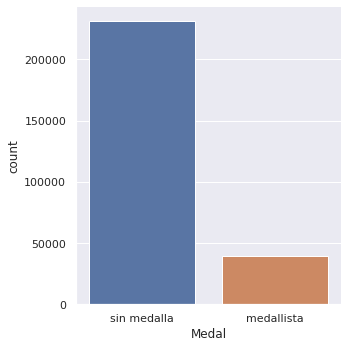

In [ ]:
sb.factorplot('Medal',data=df_altetas_med, kind="count") #visaulizamos la distribución

Se visualiza que 39.783 atletas obtuvieron medallas a lo larga de la historia y 231.333 sólo alacanzaron la participación.

Medallas-Sexo

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



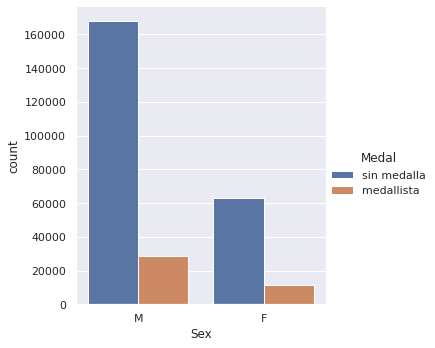

In [ ]:
sb.factorplot('Sex',data=df_altetas_med,hue='Medal',kind="count") #para visualizar la cantidad de medallistas y no medallistas por sexo

Medallas-Edad

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



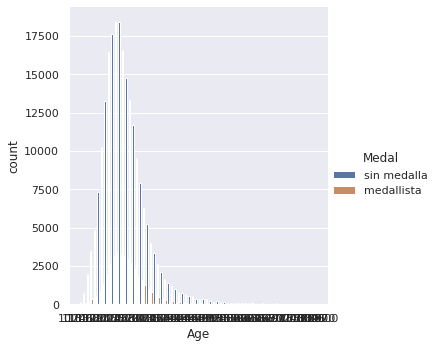

In [ ]:
sb.factorplot('Age',data=df_altetas_med,hue='Medal',kind="count")#para visualizar la cantidad de medallistas y no medallistas por edad

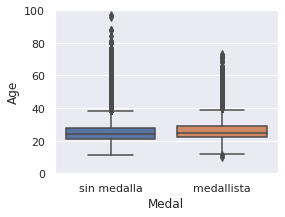

In [ ]:
#para ver estadísticos y valores atípicos en la edad
var = 'Age'
data = pd.concat([df_altetas_med['Medal'], df_altetas_med[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

Medallas - Altura

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



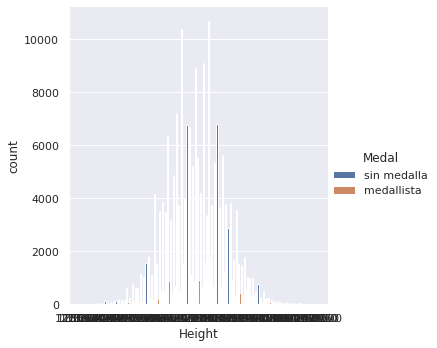

In [ ]:
sb.factorplot('Height',data=df_altetas_med,hue='Medal',kind="count") #para ver la cantidad de medallistas y no medallistas según la altura

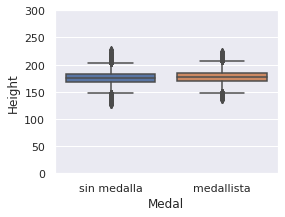

In [ ]:
#para ver estadísticos y valores atípicos en la altura
var = 'Height'
data = pd.concat([df_altetas_med['Medal'], df_altetas_med[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=300);

Medallas - Peso

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



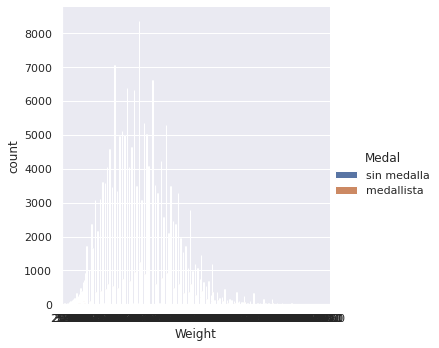

In [ ]:
sb.factorplot('Weight',data=df_altetas_med,hue='Medal',kind="count") #para ver la cantidad de medallistas y no medallistas según el peso

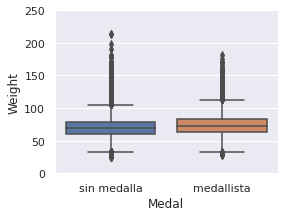

In [ ]:
#para ver estadísiticos y valores atípicos en el peso
var = 'Weight'
data = pd.concat([df_altetas_med['Medal'], df_altetas_med[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=250);

**2) Acondicionamiento de los datos**

a) Completamos los valores nulos de "Age", "Height" y "Weight" con los promedios.

In [ ]:
x = df_altetas_med["Age"].mean()

df_altetas_med["Age"].fillna(x, inplace = True) #edad

In [ ]:
x = df_altetas_med["Height"].mean()

df_altetas_med["Height"].fillna(x, inplace = True) #altura

In [ ]:
x = df_altetas_med["Weight"].mean()

df_altetas_med["Weight"].fillna(x, inplace = True) #peso

In [ ]:
df_altetas_med #visualizamos el df con las modificaciones

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.00000,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,medallista
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


In [ ]:
df_altetas_med.Height=df_altetas_med.Height.astype(int) #para asignar valores enteros a los registros de la columna "Height"

In [ ]:
df_altetas_med.Weight=df_altetas_med.Weight.astype(int) #para asignar valores enteros a los registros de la columna "Weight"

In [ ]:
print(df_altetas_med.info()) #para visualizar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  int64  
 5   Weight  271116 non-null  int64  
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 31.0+ MB
None


b) Asignación de etiquetas categóricas a las variables "Peso", "Altura" y "Edad"

In [ ]:
df_altetas_med['Talla'] = pd.cut(x=df_atletas['Height'],
                     bins=[150, 169, 189, 226],
                     labels=['Bajo', 'Promedio', 'Alto']) #se asignan etiquetas a distintos rangos de altura y se genera la columna "Talla"

In [ ]:
df_altetas_med['Peso'] = pd.cut(x=df_atletas['Weight'],
                     bins=[74, 124, 174, 224],
                     labels=['Delgado', 'Promedio', 'Robusto']) #se asignan etiquetas a distintos rangos de peso y se genera la columna "Peso"

In [ ]:
df_altetas_med['Edad'] = pd.cut(x=df_atletas['Age'],
                     bins=[9, 19, 29, 39, 49, 59, 69, 79, 89, 99],
                     labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']) #se asignan etiquetas a distintos rangos de edad y se genera la columna "Edad"

c) Codificación de la variable categórica "Medal"

In [ ]:
dummies = pd.get_dummies(df_altetas_med['Medal'], drop_first = True) #se asigna código O a los medallistas y 1 a los no medallistas y se genera la columna "sin medalla"
dummies.head()

,sin medalla
0,1
1,1
2,1
3,0
4,1


In [ ]:
df_altetas_med = pd.concat([df_altetas_med, dummies], axis = 1) #para agreagar la columna codificada al df

In [ ]:
df_altetas_med #para visualizar el df

,ID,Name,Sex,Age,Height,...,Medal,Talla,Peso,Edad,sin medalla
0,1,A Dijiang,M,24.0,180,...,sin medalla,Promedio,Delgado,20-29,1
1,2,A Lamusi,M,23.0,170,...,sin medalla,Promedio,NaN,20-29,1
2,3,Gunnar Nielsen Aaby,M,24.0,175,...,sin medalla,NaN,NaN,20-29,1
3,4,Edgar Lindenau Aabye,M,34.0,175,...,medallista,NaN,NaN,30-39,0
4,5,Christine Jacoba Aaftink,F,21.0,185,...,sin medalla,Promedio,Delgado,20-29,1
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179,...,sin medalla,Promedio,Delgado,20-29,1
271112,135570,Piotr ya,M,27.0,176,...,sin medalla,Promedio,NaN,20-29,1
271113,135570,Piotr ya,M,27.0,176,...,sin medalla,Promedio,NaN,20-29,1
271114,135571,Tomasz Ireneusz ya,M,30.0,185,...,sin medalla,Promedio,Delgado,30-39,1


In [ ]:
df_altetas_med.dtypes #para ver el tipo de datos de la columnas categóricas ("Talla",  "Peso" y "Edad" y la codificada "sin medalla"

ID                int64
Name             object
Sex              object
Age             float64
Height            int64
                 ...   
Medal            object
Talla          category
Peso           category
Edad           category
sin medalla       uint8
Length: 19, dtype: object

**3) Mapeo de los datos**

Se muestra cómo queda la obtención de medallas en relación a las variables "Talla", "Peso" y "Edad"

Altura

In [ ]:
df_altetas_med[['Talla', 'sin medalla']].groupby(['Talla'], as_index=False).agg(['mean', 'count', 'sum'])

sin medalla                  
                mean   count       sum
Talla                                 
Bajo        0.884502   57646   50988.0
Promedio    0.849766  132174  112317.0
Alto        0.773000   18978   14670.0

In [ ]:
df_Bajo=df_altetas_med.query('Talla == "Bajo"')
df_Promedio=df_altetas_med.query('Talla == "Promedio"')
df_Alto=df_altetas_med.query('Talla == "Alto"')

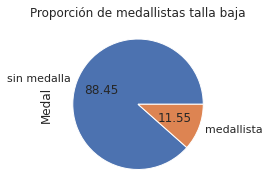

In [ ]:
plot = df_Bajo['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas talla baja')

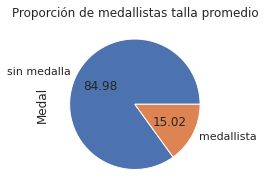

In [ ]:
plot = df_Promedio['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas talla promedio')

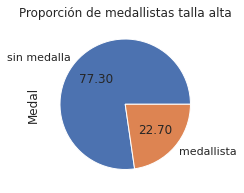

In [ ]:
plot = df_Alto['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas talla alta')

Es levemente inferior la posibilidad de "no obtener medalla" en personas de talla alta (77%), es decir que el 23% de personas altas obtendrían su medalla. Y del otro lado hay mas posibilidad de no obtener medallas para los atletas de talla baja (88%), es decir que solo un 12% de personas bajas obtendrán medallas olímpicas. 

Peso

In [ ]:
df_altetas_med[['Peso', 'sin medalla']].groupby(['Peso'], as_index=False).agg(['mean', 'count', 'sum'])

sin medalla                
                mean  count      sum
Peso                                
Delgado     0.817344  74364  60781.0
Promedio    0.804550    967    778.0
Robusto     0.818182     11      9.0

In [ ]:
df_Delgado=df_altetas_med.query('Peso == "Delgado"')
df_PromedioP=df_altetas_med.query('Peso == "Promedio"')
df_Robusto=df_altetas_med.query('Peso == "Robusto"')

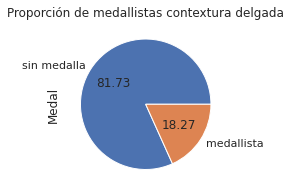

In [ ]:
plot = df_Delgado['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas contextura delgada')

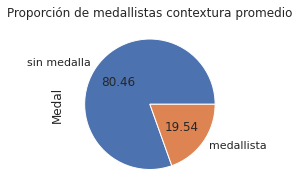

In [ ]:
plot = df_PromedioP['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas contextura promedio')

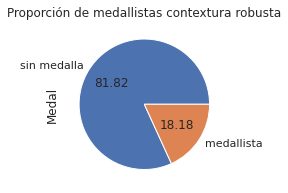

In [ ]:
plot = df_Robusto['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Proporción de medallistas contextura robusta')

El "Peso" no parece ser determinante en la posible obtención de medalla, dado que alrededor del 81 % de los atletas, sin importar su peso, no obtendría un medalla. Es decir el 19 % de los atletas obtendría una medalla, sin importar su peso. 

Edad

In [ ]:
df_altetas_med[['Edad', 'sin medalla']].groupby(['Edad'], as_index=False).agg(['mean', 'count', 'sum'])

sin medalla                  
             mean   count       sum
Edad                               
0-19     0.894499   32303   28895.0
20-29    0.845030  177744  150199.0
30-39    0.839050   42684   35814.0
40-49    0.851830    6695    5703.0
50-59    0.875481    1558    1364.0
60-69    0.930057     529     492.0
70-79    0.957627     118     113.0
80-89    1.000000       9       9.0
90-99    1.000000       2       2.0

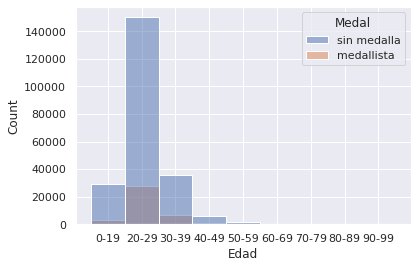

In [ ]:
sns.histplot(data=df_altetas_med, x="Edad", hue = "Medal")

Los atletas entre 19 y 29 años es mas probable que obtengan una medalla olímpica, también es el rango etario de mayor participación. Los atletas por encima de los 50 años dificilmente obtengan una medalla olímpica.

4) Matriz de correlación

In [ ]:
del df_altetas_med['Year'] #para eliminar la columna "Year" de la matriz

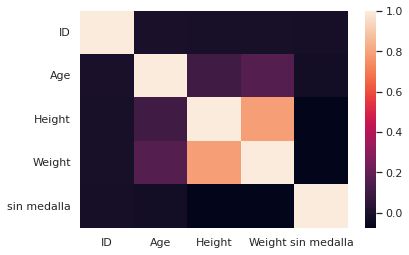

In [ ]:
corr = df_altetas_med.corr()
sns.heatmap(corr)

No parece haber fuerte correlación entre las variables estudiadas (Peso, Altura y Edad) respecto de la posibilidad de obtener una medalla olímpica. De estas 3, la Edad parece acercarse más a la posibilidad de obtener o no una medalla. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



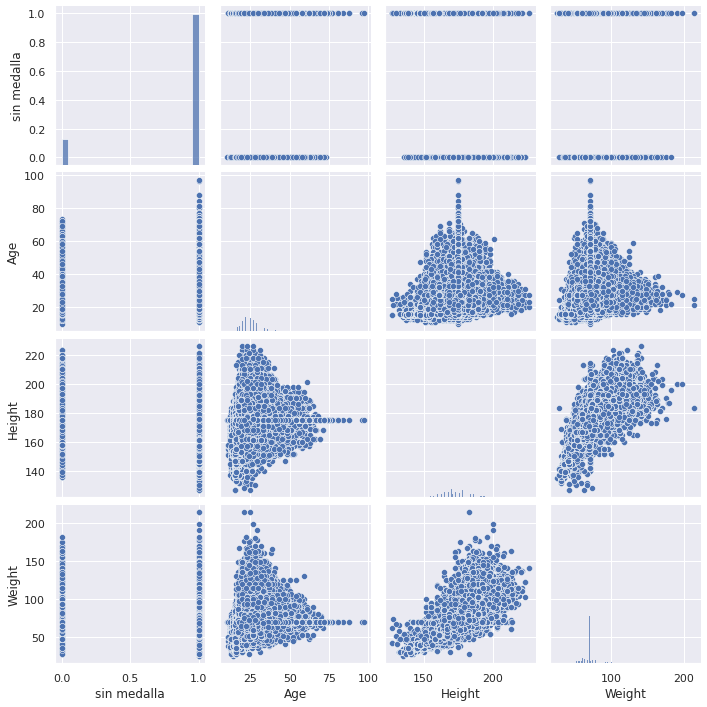

In [ ]:
sns.set()
cols = ['sin medalla','Age','Height','Weight'] 
sns.pairplot(df_altetas_med[cols], size = 2.5)
plt.show();

Se visualiza nuevamente que la Edad parece ser mas determinante al momento de predecir la obtención o no de medallas.

**Conclusión: El Peso, la Edad y la Altura no parecen determinar la consecución de una medalla olímpica. En el análisis anterior se estableció que tampoco el Sexo está relacionado con la obtención de preseas. 
Se requiere un análisis mas profundo de estas variables y abarcativo de otras.**